In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '89785272-4ec4-493f-b923-a79ea935b149',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-19T15:11:29.127Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9255}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10166, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [40]:
type(data)

dict

In [41]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [42]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

C:\Users\patel\AppData\Local\Temp\ipykernel_17640\2789829204.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19350581.00000,19350581.00000,False,NaN,1,None,None,None,2023-04-19T15:09:00.000Z,29387.56158,22508313012.77987,24.24950,-0.08673,-2.60361,-1.99770,4.80185,19.03014,40.97032,568666390822.70728,46.11510,617138793262.93994,None,2023-04-19T15:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:37:45.126773
1,1027,Ethereum,ETH,ethereum,6743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119344051.00320,119344051.00320,False,NaN,2,None,None,None,2023-04-19T15:09:00.000Z,1997.82293,12436160299.70161,42.28130,0.28826,-4.65350,4.32716,12.71094,17.69470,30.09448,238428281554.42142,19.32030,238428281554.42001,None,2023-04-19T15:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:37:45.126773
2,825,Tether,USDT,tether,51503,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81186008779.14861,84091735571.74741,False,NaN,3,None,None,None,2023-04-19T15:09:00.000Z,1.00073,39335412524.26961,26.30980,0.03940,0.03188,-0.00364,-0.13248,0.04364,0.07432,81244992097.03416,6.58030,84152829960.37000,None,2023-04-19T15:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 15:37:45.126773
3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865069.86196,155865069.86196,False,NaN,4,None,None,None,2023-04-19T15:09:00.000Z,328.79277,800670163.71771,8.43480,0.17763,-4.20986,2.51290,-2.80602,3.76466,13.21726,51247308801.08502,4.15580,51247308801.09000,None,2023-04-19T15:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:37:45.126773
4,3408,USD Coin,USDC,usd-coin,11894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31303464786.45084,31303464786.45084,False,NaN,5,None,None,None,2023-04-19T15:09:00.000Z,1.00000,5627749990.59567,42.92660,0.00841,0.00193,0.02471,0.06948,-0.00527,-0.02576,31303338552.99585,2.53540,31303338553.00000,None,2023-04-19T15:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 15:37:45.126773
5,52,XRP,XRP,xrp,933,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-19T15:09:00.000Z,0.50068,1931743500.18236,90.97890,0.50354,-3.84490,-0.91029,31.23711,26.77729,29.22019,25910622918.43035,2.10120,50068052517.77000,None,2023-04-19T15:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:37:45.126773
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34785072727.57100,35694617077.12100,False,NaN,7,None,None,None,2023-04-19T15:09:00.000Z,0.42353,500919397.14763,48.06810,0.04090,-4.39729,5.20576,24.09000,5.31632,26.80123,14732646187.21684,1.19330,19059010846.89000,None,2023-04-19T15:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:37:45.126773
7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139003726383.70541,139003726383.70541,False,NaN,8,None,None,None,2023-04-19T15:09:00.000Z,0.09145,1098590313.63551,39.88570,1.25497,-2.37984,10.81325,24.15005,4.33528,12.76181,12711640405.12983,1.02960,12711640405.13000,None,2023-04-19T1

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '89785272-4ec4-493f-b923-a79ea935b149',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    df 
    
    
    if not os.path.isfile(r'C:\Users\patel\Desktop\data prjects\Crypto\API.csv'):
        df.to_csv(r'C:\Users\patel\Desktop\data prjects\Crypto\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\patel\Desktop\data prjects\Crypto\API.csv', mode = 'a', header = False)
    
    
    

In [9]:
import os
from time import time
from time import sleep


for i in range(5):
    api_runner()
    print('API RUNNER ran successfully')
    sleep (60)
main()
#exit()

C:\Users\patel\AppData\Local\Temp\ipykernel_17640\1167309041.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API RUNNER ran successfully


C:\Users\patel\AppData\Local\Temp\ipykernel_17640\1167309041.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API RUNNER ran successfully


C:\Users\patel\AppData\Local\Temp\ipykernel_17640\1167309041.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API RUNNER ran successfully


C:\Users\patel\AppData\Local\Temp\ipykernel_17640\1167309041.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API RUNNER ran successfully


C:\Users\patel\AppData\Local\Temp\ipykernel_17640\1167309041.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API RUNNER ran successfully


NameError: name 'main' is not defined

In [10]:
df3 = pd.read_csv(r'C:\Users\patel\Desktop\data prjects\Crypto\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.935058e+07,1.935058e+07,False,NaN,1,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,29412.580913,2.248580e+10,23.8676,-0.052988,-2.508506,-1.443448,5.023228,19.313644,41.084014,5.691505e+11,46.1590,6.176642e+11,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
1,1,1027,Ethereum,ETH,ethereum,6743,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.193441e+08,1.193441e+08,False,NaN,2,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1998.101234,1.246491e+10,42.9933,0.153799,-4.702965,4.733306,12.820804,17.851031,30.047121,2.384615e+11,19.3396,2.384615e+11,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
2,2,825,Tether,USDT,tether,51503,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.118601e+10,8.409174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1.000738,3.932352e+10,26.0019,0.013100,0.041467,-0.014744,-0.178155,0.049876,0.075734,8.124590e+10,6.5892,8.415377e+10,NaN,2023-04-19T15:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 15:18:38.325344
3,3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558651e+08,1.558651e+08,False,NaN,4,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,328.770063,8.004154e+08,8.8393,-0.058555,-4.149712,2.986380,-2.707355,3.894014,13.248390,5.124377e+10,4.1559,5.124377e+10,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
4,4,3408,USD Coin,USDC,usd-coin,11895,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.130346e+10,3.130346e+10,False,NaN,5,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1.000047,5.600797e+09,41.3624,0.000777,0.016979,0.014774,0.042169,0.002360,-0.010627,3.130493e+10,2.5389,3.130493e+10,NaN,2023-04-19T15:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 15:18:38.325344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,6636,Polkadot,DOT,polkadot-new,497,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.177471e+09,1.303950e+09,False,NaN,11,NaN,NaN,NaN,2023-04-19T15:21:00.000Z,6.508330,2.799126e+08,25.1099,-0.116522,-5.552521,2.137794,2.318935,-9.915671,12.613091,7.663369e+09,0.6215,8.486535e+09,NaN,2023-04-19T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:22:39.329404
71,11,2,Litecoin,LTC,litecoin,905,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.273951e+07,8.400000e+07,False,NaN,12,NaN,NaN,NaN,2023-04-19T15:21:00.000Z,95.151311,7.205987e+08,-5.1415,-0.429138,-6.131126,3.626140,15.842116,-4.681870,13.918036,6.921260e+09,0.5609,7.992710e+09,NaN,2023-04-19T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:22:39.329404
72,12,4687,Binance USD,BUSD,binance-usd,6624,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,6.641006e+09,6.641006e+09,False,NaN,13,NaN,NaN,NaN,2023-04-19T15:21:00.000Z,1.000235,4.049117e+09,25.4291,-0.032012,-0.002946,-0.000804,0.108119,0.020516,-0.011242,6.642568e+09,0.5384,6.642568e+09,NaN,2023-

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x )

In [12]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19350581.00000,19350581.00000,False,NaN,1,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,29412.58091,22485795201.61140,23.86760,-0.05299,-2.50851,-1.44345,5.02323,19.31364,41.08401,569150529380.85474,46.15900,617664199178.19995,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
1,1,1027,Ethereum,ETH,ethereum,6743,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119344051.00320,119344051.00320,False,NaN,2,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1998.10123,12464910050.13845,42.99330,0.15380,-4.70296,4.73331,12.82080,17.85103,30.04712,238461495541.83463,19.33960,238461495541.82999,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
2,2,825,Tether,USDT,tether,51503,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81186008779.14861,84091735571.74741,False,NaN,3,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1.00074,39323518598.47872,26.00190,0.01310,0.04147,-0.01474,-0.17816,0.04988,0.07573,81245901596.78621,6.58920,84153772012.00999,NaN,2023-04-19T15:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 15:18:38.325344
3,3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865069.86196,155865069.86196,False,NaN,4,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,328.77006,800415354.13732,8.83930,-0.05856,-4.14971,2.98638,-2.70735,3.89401,13.24839,51243768827.72715,4.15590,51243768827.73000,NaN,2023-04-19T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:18:38.325344
4,4,3408,USD Coin,USDC,usd-coin,11895,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31303464786.45084,31303464786.45084,False,NaN,5,NaN,NaN,NaN,2023-04-19T15:17:00.000Z,1.00005,5600797196.78731,41.36240,0.00078,0.01698,0.01477,0.04217,0.00236,-0.01063,31304931079.46344,2.53890,31304931079.46000,NaN,2023-04-19T15:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 15:18:38.325344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,6636,Polkadot,DOT,polkadot-new,497,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1177470851.51908,1303949728.82426,False,NaN,11,NaN,NaN,NaN,2023-04-19T15:21:00.000Z,6.50833,279912610.89677,25.10990,-0.11652,-5.55252,2.13779,2.31893,-9.91567,12.61309,7663368986.64400,0.62150,8486535271.02000,NaN,2023-04-19T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:22:39.329404
71,11,2,Litecoin,LTC,litecoin,905,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72739514.32100,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-04-19T15:21:00.000Z,95.15131,720598680.82481,-5.14150,-0.42914,-6.13113,3.62614,15.84212,-4.68187,13.91804,6921260173.41605,0.56090,7992710152.03000,NaN,2023-04-19T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 15:22:39.329404
72,12,4687,Binance USD,BUSD,binance-usd,6624,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,6641005977.71338,6641005977.71338,False,NaN,13,NaN,NaN,NaN,2023-04-19T15:21:00.

In [13]:
df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01621,-2.50237,-1.44543,5.10401,19.28523,40.91294
Ethereum,0.18205,-4.67391,4.73768,12.83780,17.81419,29.86252
Tether,-0.00066,0.02963,-0.01260,-0.14366,0.04073,0.06793
BNB,0.00199,-4.14924,3.10002,-2.62535,3.90526,13.19865
USD Coin,-0.01359,0.00029,0.01439,0.07685,-0.01034,-0.02683
XRP,0.15067,-3.70334,-0.38015,31.36691,26.78560,29.11471
Cardano,-0.26558,-4.24253,5.80013,24.28750,5.37443,26.51134
Dogecoin,0.03395,-2.58770,11.38005,24.31931,4.41978,12.63337
Polygon,-0.20282,-4.18153,1.32070,-1.79546,-26.28811,19.35823


In [14]:
df5 = df4.stack()
df5

name                                   
Bitcoin    quote.USD.percent_change_1h    -0.01621
           quote.USD.percent_change_24h   -2.50237
           quote.USD.percent_change_7d    -1.44543
           quote.USD.percent_change_30d    5.10401
           quote.USD.percent_change_60d   19.28523
                                            ...   
Avalanche  quote.USD.percent_change_24h   -6.83535
           quote.USD.percent_change_7d     7.47906
           quote.USD.percent_change_30d   14.46572
           quote.USD.percent_change_60d    0.27074
           quote.USD.percent_change_90d   23.15436
Length: 90, dtype: float64

In [15]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                           
Bitcoin   quote.USD.percent_change_1h  -0.01621
          quote.USD.percent_change_24h -2.50237
          quote.USD.percent_change_7d  -1.44543
          quote.USD.percent_change_30d  5.10401
          quote.USD.percent_change_60d 19.28523
...                                         ...
Avalanche quote.USD.percent_change_24h -6.83535
          quote.USD.percent_change_7d   7.47906
          quote.USD.percent_change_30d 14.46572
          quote.USD.percent_change_60d  0.27074
          quote.USD.percent_change_90d 23.15436

[90 rows x 1 columns]

In [16]:
index = pd.Index(range(29898))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01621
1,Bitcoin,quote.USD.percent_change_24h,-2.50237
2,Bitcoin,quote.USD.percent_change_7d,-1.44543
3,Bitcoin,quote.USD.percent_change_30d,5.10401
4,Bitcoin,quote.USD.percent_change_60d,19.28523
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-6.83535
86,Avalanche,quote.USD.percent_change_7d,7.47906
87,Avalanche,quote.USD.percent_change_30d,14.46572
88,Avalanche,quote.USD.percent_change_60d,0.27074


In [35]:
df8 = df7.rename(columns = {'level_1' : 'Percent Change'})
df8

,name,Percent Change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01621
1,Bitcoin,quote.USD.percent_change_24h,-2.50237
2,Bitcoin,quote.USD.percent_change_7d,-1.44543
3,Bitcoin,quote.USD.percent_change_30d,5.10401
4,Bitcoin,quote.USD.percent_change_60d,19.28523
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-6.83535
86,Avalanche,quote.USD.percent_change_7d,7.47906
87,Avalanche,quote.USD.percent_change_30d,14.46572
88,Avalanche,quote.USD.percent_change_60d,0.27074


In [36]:
df8['Percent Change'] = df8['Percent Change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,Percent Change,values
0,Bitcoin,1h,-0.01621
1,Bitcoin,24h,-2.50237
2,Bitcoin,7d,-1.44543
3,Bitcoin,30d,5.10401
4,Bitcoin,60d,19.28523
...,...,...,...
85,Avalanche,24h,-6.83535
86,Avalanche,7d,7.47906
87,Avalanche,30d,14.46572
88,Avalanche,60d,0.27074


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

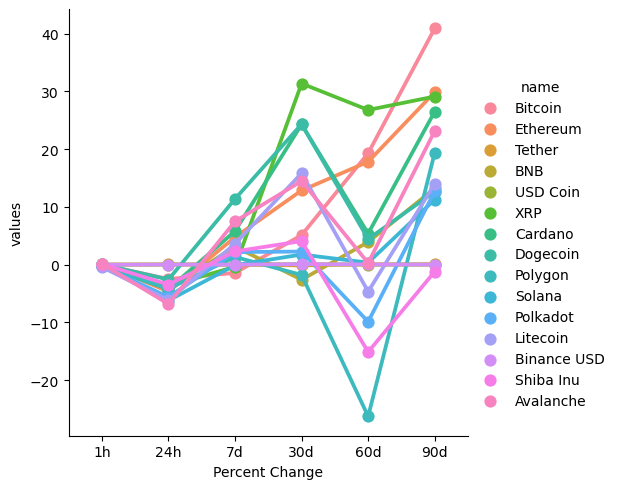

In [38]:
sns.catplot(x = 'Percent Change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [46]:
df9 = df3[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,29412.58091,2023-04-19 15:18:38.325344
15,Bitcoin,29415.66927,2023-04-19 15:19:38.556285
30,Bitcoin,29411.49485,2023-04-19 15:20:38.836072
45,Bitcoin,29422.56893,2023-04-19 15:21:39.054989
60,Bitcoin,29423.00676,2023-04-19 15:22:39.329404


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

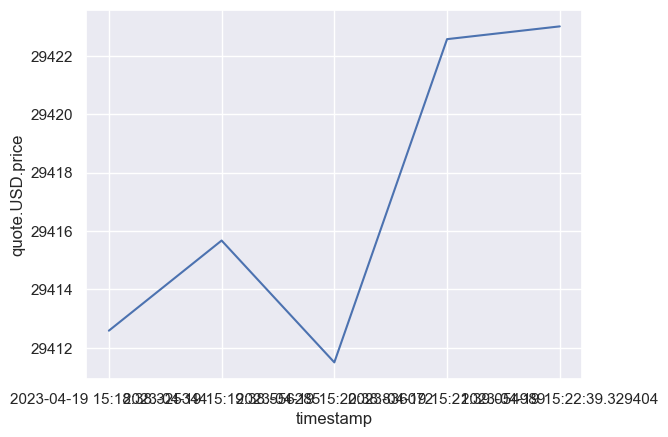

In [50]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x ='timestamp', y = 'quote.USD.price' , data = df9)